In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

IMPORTING LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [6]:
data=pd.read_csv("/kaggle/input/customer-online-food-delivery-dataset/Customer online delivery dataset - Customer_data.csv",sep=",")

In [7]:
data.head()

,Age,Gender,Marital Status,Occupation,Educational Qualifications,Family size,Frequently used Medium,Frequently ordered Meal category,Perference,Restaurnat Rating,...,Order Value,Ease and convenient,Self Cooking,Health Concern,Late Delivery,Poor Hygiene,Bad past experience,More Offers and Discount,Maximum wait time,Influence of rating
0,20,Female,Single,Student,Post Graduate,4,Food delivery apps,Breakfast,Non Veg foods (Lunch / Dinner),1,...,1,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,30 minutes,Yes
1,24,Female,Single,Student,Graduate,3,Food delivery apps,Snacks,Non Veg foods (Lunch / Dinner),1,...,3,Strongly agree,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree,30 minutes,Yes
2,22,Male,Single,Student,Post Graduate,3,Food delivery apps,Lunch,Non Veg foods (Lunch / Dinner),3,...,1,Strongly agree,Disagree,Neutral,Neutral,Agree,Agree,Neutral,45 minutes,Yes
3,22,Female,Single,Student,Graduate,6,Food delivery apps,Snacks,Veg foods (Breakfast / Lunch / Dinner),2,...,1,Agree,Agree,Strongly agree,Neutral,Agree,Disagree,Strongly agree,30 minutes,Yes
4,22,Male,Single,Student,Post Graduate,4,Walk-in,Lunch,Non Veg foods (Lunch / Dinner),3,...,3,Agree,Agree,Strongly agree,Strongly agree,Agree,Strongly agree,Agree,30 minutes,Yes


In [9]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Age                                499 non-null    int64 
 1   Gender                             498 non-null    object
 2   Marital Status                     499 non-null    object
 3   Occupation                         498 non-null    object
 4   Educational Qualifications         499 non-null    object
 5   Family size                        499 non-null    int64 
 6   Frequently used Medium             498 non-null    object
 7   Frequently ordered Meal category   498 non-null    object
 8   Perference                         498 non-null    object
 9   Restaurnat Rating                  499 non-null    int64 
 10  Delivery Rating                    499 non-null    int64 
 11  No. of orders placed               499 non-null    int64 
 12  Delivery

In [10]:
data.describe()

,Age,Family size,Restaurnat Rating,Delivery Rating,No. of orders placed,Order Value
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,25.779559,3.350701,2.991984,2.959920,138.933868,1.969940
std,4.329722,1.510091,1.399920,1.413644,67.735678,0.826942
min,18.000000,1.000000,1.000000,1.000000,23.000000,1.000000
25%,23.000000,2.000000,2.000000,2.000000,80.500000,1.000000
50%,25.000000,3.000000,3.000000,3.000000,139.000000,2.000000
75%,29.000000,5.000000,4.000000,4.000000,199.500000,3.000000
max,35.000000,6.000000,5.000000,5.000000,257.000000,3.000000


In [23]:
data.columns = data.columns.str.strip()
data.columns


Index(['Age', 'Gender', 'Marital Status', 'Occupation',
       'Educational Qualifications', 'Family size', 'Frequently used Medium',
       'Frequently ordered Meal category', 'Perference', 'Restaurnat Rating',
       'Delivery Rating', 'No. of orders placed', 'Delivery Time',
       'Order Value', 'Ease and convenient', 'Self Cooking', 'Health Concern',
       'Late Delivery', 'Poor Hygiene', 'Bad past experience',
       'More Offers and Discount', 'Maximum wait time', 'Influence of rating'],
      dtype='object')

CHECKING OUTLIERS

<Axes: >

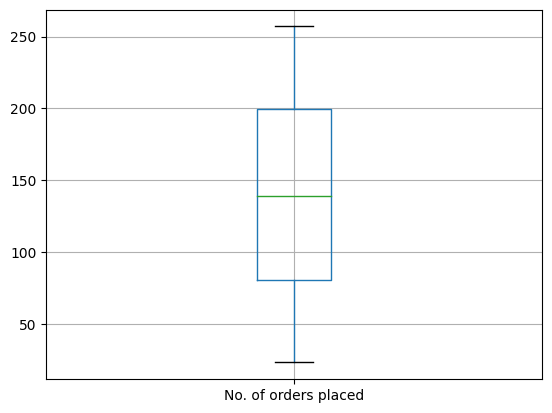

In [17]:
data.boxplot(column='No. of orders placed')

CROSS TABULATION

In [18]:
pd.crosstab(data['Gender'], data['Frequently used Medium'])

Frequently used Medium,Direct call,Food delivery apps,Walk-in,Web browser
Gender,,,,
Female,2,204,9,2
Male,4,255,20,1


Assigning Ranks to categories of Food

In [26]:
data['rank'] = data['Frequently ordered Meal category'].rank()
data['rank']

0       43.5
1      425.0
2      269.5
3      425.0
4      269.5
       ...  
494    137.0
495    269.5
496    269.5
497    269.5
498    269.5
Name: rank, Length: 499, dtype: float64

Checking For Duplicates

In [27]:
data[data.duplicated()]

,Age,Gender,Marital Status,Occupation,Educational Qualifications,Family size,Frequently used Medium,Frequently ordered Meal category,Perference,Restaurnat Rating,...,Ease and convenient,Self Cooking,Health Concern,Late Delivery,Poor Hygiene,Bad past experience,More Offers and Discount,Maximum wait time,Influence of rating,rank


In [31]:
import plotly.express as px

meal_counts = data['Frequently ordered Meal category'].value_counts().reset_index()
meal_counts.columns = ['Meal Category', 'Count']

fig = px.treemap(meal_counts, path=['Meal Category'], values='Count', color='Count', hover_data=['Meal Category'])
fig.update_layout(title='Meal Category Distribution Treemap')
fig.show()




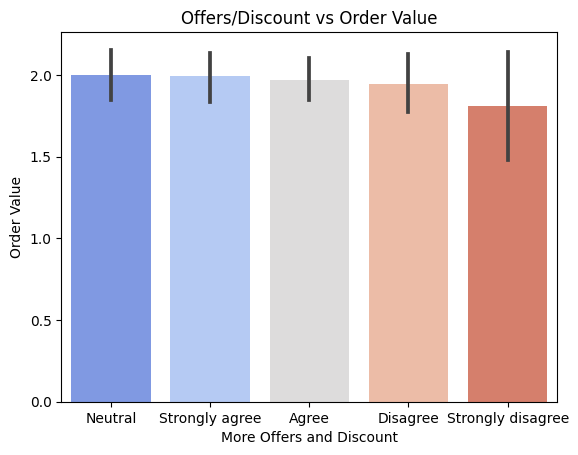

In [35]:
sn.barplot(data=data, x='More Offers and Discount', y='Order Value', palette='coolwarm')
plt.title('Offers/Discount vs Order Value')
plt.show()
